In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded=files.upload()
print(uploaded)

X_train=pd.read_csv("/content/train.csv")

X_train.head()

X_train.columns

l1=['PassengerId','Name','Ticket','Cabin']

X_train.drop(l1,axis=1,inplace=True)

X_train.info()

X_train.isnull().sum()

X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)
X_train["Embarked"].fillna("S",inplace=True)

X_train['Embarked'].mode()

X_train.isnull().sum()

X_train.shape

X_train.head()

from sklearn.preprocessing import LabelEncoder
le_g=LabelEncoder()
le_e=LabelEncoder()

X_train["Sex"]=le_g.fit_transform(X_train["Sex"])
X_train["Embarked"]=le_e.fit_transform(X_train["Embarked"])

X_train.head()

X=X_train.iloc[:,1:].values
Y=X_train.iloc[:,0].values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

X[:5]

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
{'test (1).csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Ste

/tmp/ipython-input-2895974707.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)
/tmp/ipython-input-2895974707.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414]])

In [46]:
from sklearn.svm import SVC
clf1=SVC(C=100,gamma=1) # C must be high and gamma low
clf1.fit(X,Y)



SVC(C=100, gamma=1)

In [42]:
pred_y1 =clf1.predict(X)

In [43]:
clf1.score(X,Y)

0.9135802469135802

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(Y,pred_y1))

[[517  32]
 [ 45 297]]


# C high → strict classification
# gamma low → smooth boundary


C  → how strict the model is
gamma → how curly the boundary is



| Feature  | Logistic    | SVM                 |
| -------- | ----------- | ------------------- |
| Output   | Probability | Class               |
| Boundary | Linear      | Linear / Non-linear |
| Robust   | Less        | More                |
| Kernel   | ❌           | ✅                   |
| Scaling  | Recommended | Mandatory           |


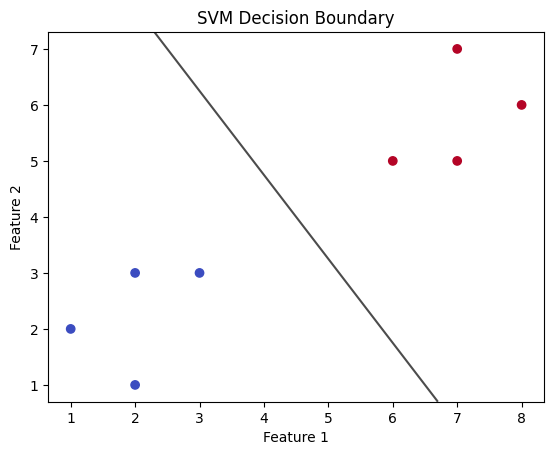

In [51]:
# diagram for visualization

# Create simple 2D data
A = np.array([
    [1,2], [2,3], [3,3], [2,1],
    [6,5], [7,7], [8,6], [7,5]
])

B = np.array([0,0,0,0, 1,1,1,1])
model = SVC(kernel='linear', C=100,gamma=1)
model.fit(A,B)
def plot_svm_boundary(model, X, Y):
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy)
    Z = Z.reshape(XX.shape)

    # Decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.7)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()
plot_svm_boundary(model, A,B)



SVM decision boundary visualization requires reducing features to 2D; the plotted boundary is an approximation for intuition, not the full model.

❌ This diagram is NOT your real model
✅ It is only for understanding

Your real model:

SVC(C=100, gamma=1)


works in multi-dimensional space, which humans cannot see

# ONE MORE EXAMPLE

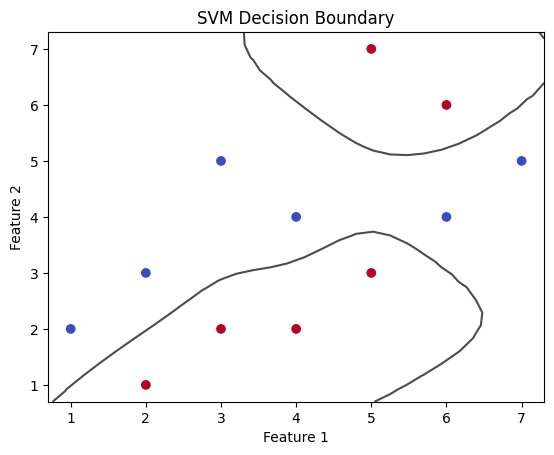

In [52]:
# More complex non-linear data
C = np.array([
    [1,2], [2,3], [3,2], [2,1],
    [4,4], [5,3], [3,5], [4,2],
    [6,6], [7,5], [5,7], [6,4]
])

# Mixed labels (non-linearly separable)
D = np.array([0,0,1,1, 0,1,0,1, 1,0,1,0])
model = SVC(kernel='rbf', C=10, gamma=1)
model.fit(C, D)
plot_svm_boundary(model, C, D)




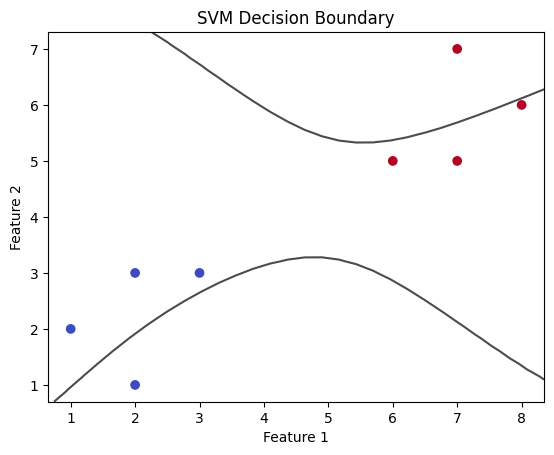

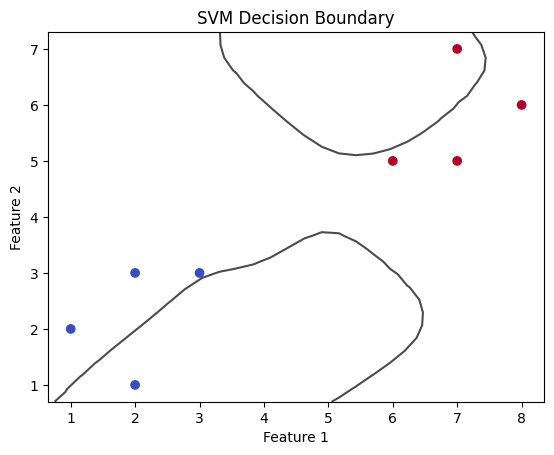

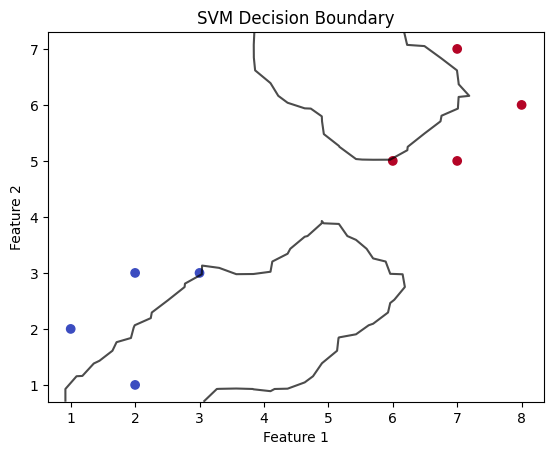

In [56]:
for g in [0.1, 1, 10]:
    model = SVC(kernel='rbf', C=10, gamma=g)
    model.fit(C, D)
    plot_svm_boundary(model, A, B)
    #gamma = 0.1 → smooth boundary
    # gamma = 10 → very wiggly (overfitting)

  #“Curved decision boundaries in SVM are achieved using non-linear kernels like RBF, which implicitly map data into higher-dimensional space.”


| Parameter     | Effect on Boundary |
| ------------- | ------------------ |
| kernel=linear | Straight line      |
| kernel=rbf    | Curved line        |
| Small C       | Wide margin        |
| Large C       | Narrow margin      |
| Small gamma   | Smooth boundary    |
| Large gamma   | Complex boundary   |
